<a href="https://colab.research.google.com/github/V31T/ML_INTRO_CS133/blob/main/HENRY_PHAM_CS133_ho15_ho16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hands-on 15**

### **Goal**:
You are the data scientist assigned to perform the data pre-processing and preparing the data for Machine Learning algorithms.

1. perform data exploration to understand the data (2.5 points)
2. prepare the test and training sets. (2.5 points)
3. pre-processing of the data, including fixing all the missing values (set the missing values to median values) and any other ones that you think are appropriate to perform. Build a pipeline to perform data transformation. (5 points)

In the next hands-on, we will use 14 out of 15 attributes as pedictors describe below to predict if income goes above or below \$50K/yr based on census data. `Income` will be the label.

### Data:
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

### Fields:
The dataset contains 15 columns

#### Target field: Income
- The income is divide into two classes: 50K

#### Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information

- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- `salary`: >50K,<=50K

Note: "?" is used to represent missing data in this dataset.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Read in data
adults = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/adult.csv'
df = pd.read_csv(adults, na_values=['?'])

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Hands-on 15 Part 1: Data Exploration (2.5 points)

In [ ]:
# Your code here . . .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [ ]:
df["gender"].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [ ]:
df["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [ ]:
df["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [ ]:
df["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [ ]:
df["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

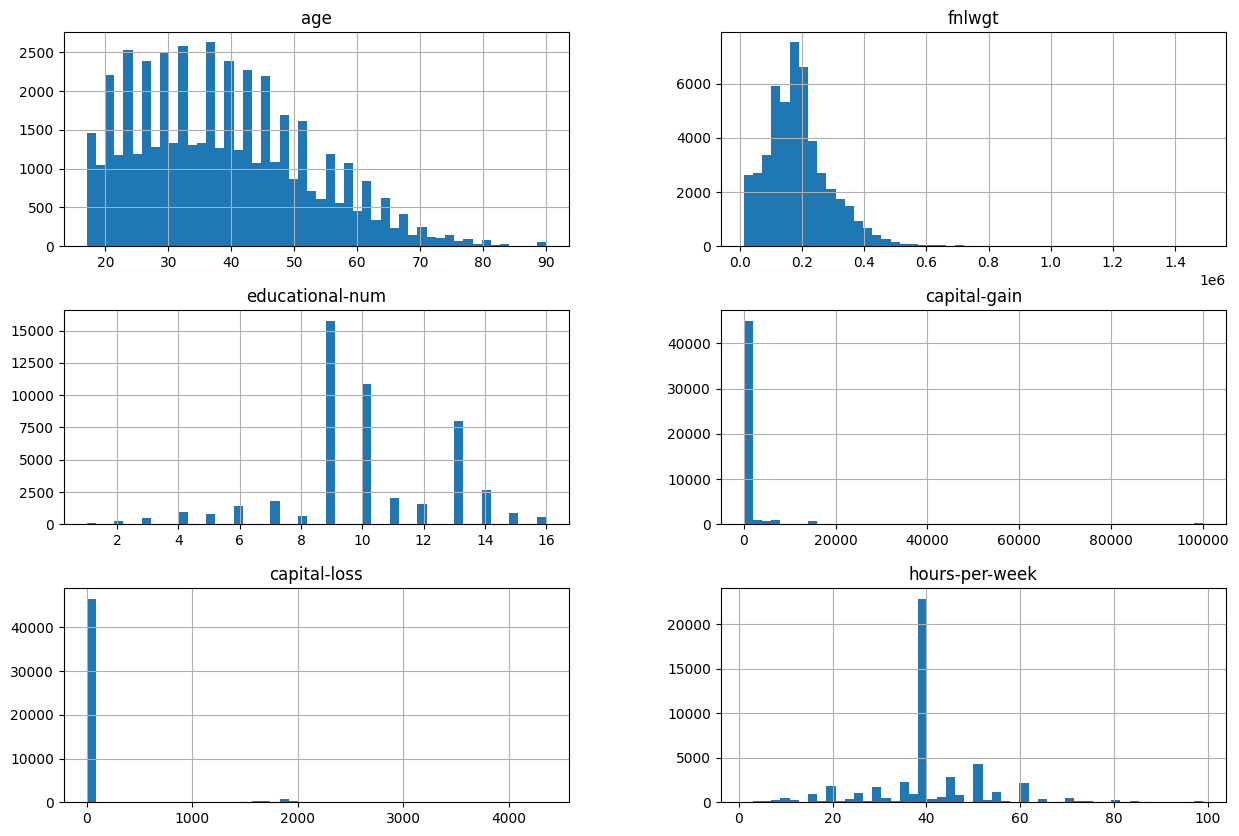

In [ ]:
##from matplot libraries
df.hist(bins=50, figsize=(15,10))
plt.show()

**Immediate Observations**  

more than 75% of dataset has >50k income, could assume that any columns that have a single high value count share a strong correlation to the person's income. So far, just off counting values, Gender, workforce, hours-per-week and marital status seem to have a high impact on income level. Existence of capital gain or loss could have a strong impact on income level too.  

occupation, workclass, and native-country have null values


## Hands-on 15 Part 2: Prepare Training & Testing data sets (2.5 points)

# RUN THIS TO USE SIMPLE SPLIT TEST AND TRAINING SETS

In [ ]:
# Your code here . . .
from sklearn.model_selection import train_test_split

df = pd.read_csv(adults, na_values=['?'])

# Split the data into train and test sets *_split( df, 20% of the data, seed = 42)
# a very simple split of 80% train and 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Separate the labels and features in the train set
train_labels = train_df['income']
train_data = train_df.drop('income', axis=1)

# Separate the labels and features in the test set
test_labels = test_df['income']
test_data = test_df.drop('income', axis=1)
train_df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
37193,42,Private,145175,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
31093,52,Self-emp-not-inc,175029,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,<=50K
33814,34,Local-gov,172664,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
14500,28,Private,125791,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
23399,46,Private,28419,Assoc-voc,11,Never-married,Transport-moving,Not-in-family,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,Private,635913,HS-grad,9,Married-spouse-absent,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
44732,34,Private,107624,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
38158,28,Private,250135,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
860,46,State-gov,96652,Assoc-voc,11,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


# RUN TO USE STRATIFIED SPLIT TEST AND TRAIN SET

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

df = pd.read_csv(adults, na_values=['?'])

# Create a StratifiedShuffleSplit object
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the index of the train and test sets
for train_index, test_index in split.split(df, df['income']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# moved here to keep track of how df is being modified
df = strat_train_set.drop("income", axis=1)
df_labels = strat_train_set["income"].copy()

In [22]:
# df = strat_train_set.drop("income", axis=1)
# df_labels = strat_train_set["income"].copy()

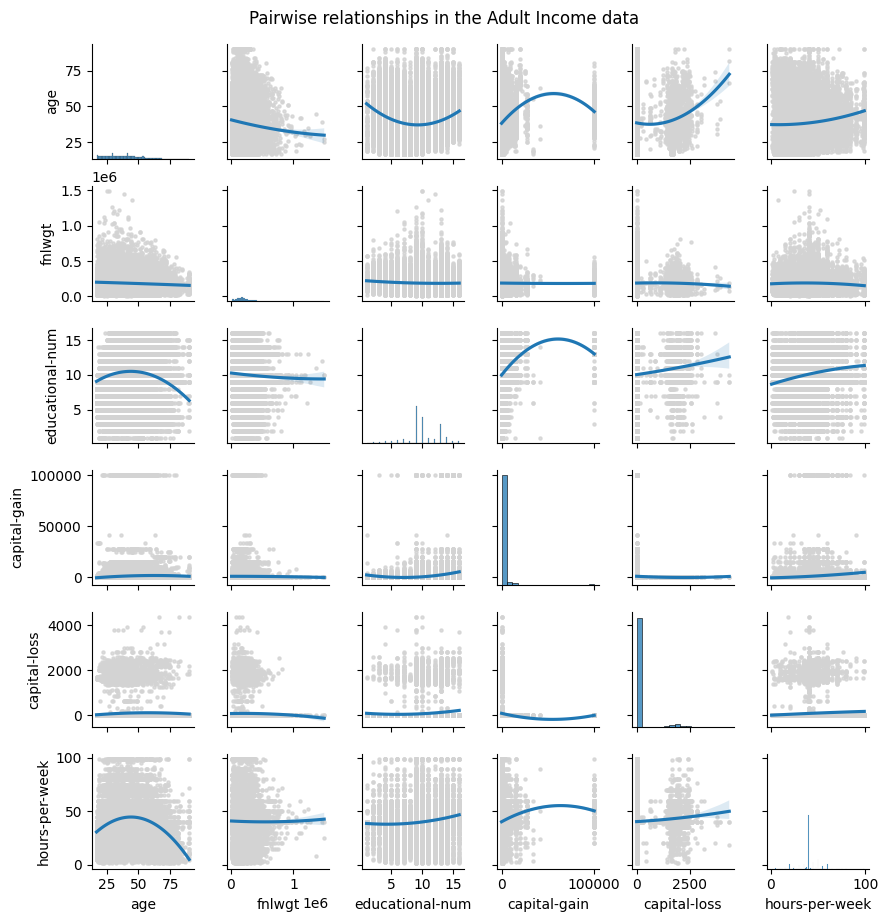

In [ ]:
#Computing standard correlation coefficients (Pearson's r)

g=sns.pairplot(
    data=df,
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=1.5 # make the individual plots small
);
g.figure.suptitle("Pairwise relationships in the Adult Income data", y=1.02);

Text(0.5, 1.0, 'Linear Regression plot of hours-per-week and education-num')

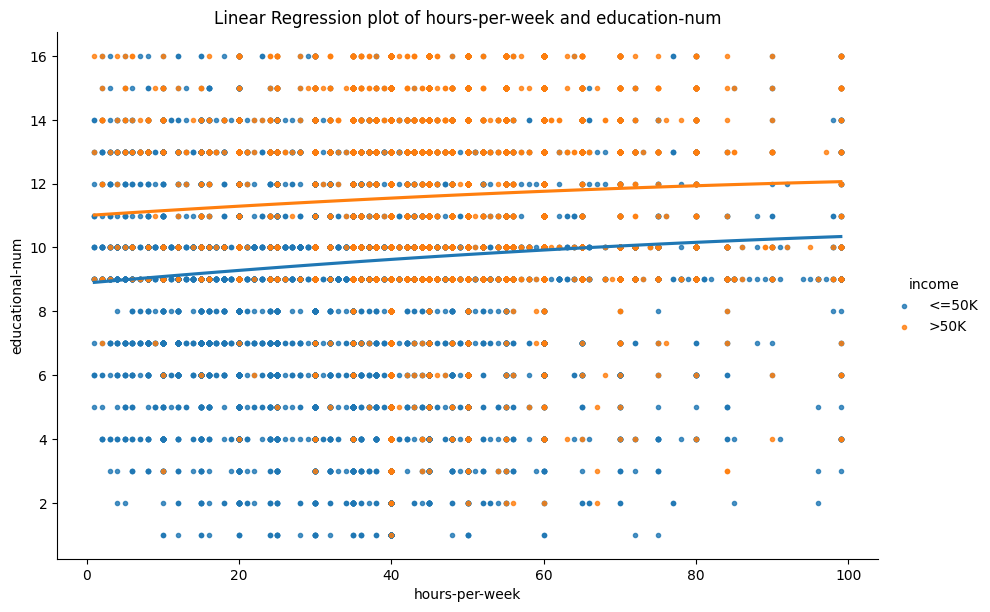

In [ ]:
#hours-per-week and education-num are positively correlated with each other
sns.lmplot(data=df, x='hours-per-week', y='educational-num', ci = None, order = 2, hue = 'income', height=6, aspect=1.5, markers = '.')
plt.title("Linear Regression plot of hours-per-week and education-num")
#notice the positive trende

## Hands-on 15 Part 3: Pre-processing data (5 points)

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [17]:
# get the numerical columns & cat columns
num_attribs = [cols for cols in df.columns if df[cols].dtype != "object"]
cat_attribs = [cols for cols in df.columns if df[cols].dtype == "object"]

# create pipeline for numerical data
num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        # ('attribs_adder', CombinedAttributesAdder()),  # lmao i have no idea whats going on in that part of the lecture  
        ("std_scaler", StandardScaler()),
    ]
)

# fit and transform the numerical data
num_df = df.drop(cat_attribs, axis=1)
tr_num_df = num_pipeline.fit_transform(num_df)

print(num_attribs) # numerical columns
print(cat_attribs) # categorical columns

# create a full pipeline
full_pipeline = ColumnTransformer([
        ("nums", num_pipeline, num_attribs), 
        ("cat", OneHotEncoder(), cat_attribs)
    ])

# fit and transform the data
df_prepared = full_pipeline.fit_transform(df)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [21]:
income_prep_df = pd.DataFrame(df_prepared, columns=df.columns)
#idk how to do this part


ValueError: Shape of passed values is (48842, 1), indices imply (48842, 15)

## **Hands-on 16**
Use the results from Hands-on 15 for the following steps:

1. Select ML Models and perform 10-fold Cross Validation. (5 points)
2. Pick the best model from step 1 and perform fine-tuning. (2.5 points)
3. Test ML model with the test set. (2.5 points)
4. Bonus: Create a plot with ROC curves to compare the performance of the ML models that you have trained using different ML classifiers. (2 points)

## Hands-on 16 Part 1: Select ML Models, perform 10-fold Cross Validation (5 points)
Try four different ML models for classification.

In [ ]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Your code here . . .



## Hands-on 16 Part 2: Pick the best model from Part 1 and perform fine-tuning (2.5 points)

In [ ]:
# Your code here . . .

## Test ML model with the test set (2.5 points)
Use the fine-tuned model and evaluate its performance using the test set that you have created in Hands-on 15.

In [ ]:
# Your code here . . .

## Bonus: Plot the ROC curve to compare the performace of the ML classifiers (1  point)

In [ ]:
# Your code here . . .

## Bonus: Evaluating the model using the Confusion Matrix and a Precision-Recall Curve (1 point)
A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics such as [accuracy, precision, recall, and F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html). Here is [an article](https://medium.com/swlh/explaining-accuracy-precision-recall-and-f1-score-f29d370caaa8) that gives a good explaination of Precision, Recall, and F1-score.

### Accuracy

Accuracy = $\frac{True\ Positives\ +\ True\ Negatives}{All\ Samples}$

### Precision (aka Specificity)

Precision = $\frac{True\ Positives}{True\ Positives\ +\ False\ Positives}$
= $\frac{True\ Positives}{Total\ Predicted\ Positives}$


### Recall (aka Sensitivity)

Recall = $\frac{True\ Positives}{True\ Positives\ +\ False\ Negatives}$
= $\frac{True\ Positives}{Total\ Actual\ Positives}$

### F1-score (combining Precision and Recall)

F1-score = $\frac{2\ ×\ (Precision\ ×\ Recall)}{Precision\ +\ Recall}$

In [ ]:
# Your code here . . .

## Precision-Recall Curve
[Precision-Recall Curve documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)


In [ ]:
# Your code here . . .
